[<center><img src="./images/logo_fly.png">](https://www.flyeducacao.org/)
# Mulheres in Tech</center>
<hr>     

## **Machine Learning - Um Exemplo**

<hr>

# Um Projeto Exemplo

## Visão Geral
Este é exemplo de projeto de Machine Learning, utilizando a metodologia CRISP-DM.  

Para a montagem deste exemplo, utilizamos o dataset disponibilidado pelo Kaggle no desafio do [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic) e vários blocos extraídos de trabalhos entregues por alunos do [I2A2](https://www.i2a2.academy) em cursos abertos promovidos no passado.  

Você pode se perguntar, por que utilizamos esta base?  
Utilizamos esta base porque ela é pequena, possui diversas características interessantes e já foi vastamente documentada.  

Então... bom divertimento!

<hr>

## Descrição  

Esta é a lendária competição Titanic - o primeiro desafio para você mergulhar nas competições de ML e se familiarizar com o funcionamento da plataforma Kaggle.

A competição é simples: use o aprendizado de máquina para criar um modelo que prevê quais passageiros sobreviveram ao naufrágio do Titanic.

**Fonte:** Kaggle (https://www.kaggle.com/competitions/titanic)

### Framework Adotado

Para o presente exemplo foi adotada a metodologia CRISP-DS (Cyclic Methodology for Data Science Projects) que guiará todas as fases do desenvolvimento do projeto. A Figura 1, apresenta a visão gráfica do modelo CRISP-DM.

<center><img src="https://upload.wikimedia.org/wikipedia/commons/b/b9/CRISP-DM_Process_Diagram.png" width="400px"></center>  
<center>Figura 1 - O Modelo CRISP-DM (fonte: Wikimedia, autor: Kenneth Jensen)

<hr>

## Etapa 1 - Business Undestanding  

O naufrágio do RMS Titanic é um dos naufrágios mais famosos da história.  
Em 15 de abril de 1912, durante sua viagem inaugural, saindo do porto de Southhampton até New York, o Titanic afundou após colidir com um iceberg, matando 1.502 dos 2.224 passageiros e tripulantes (**taxa de sobrevivência de 32%**).  
Esta tragédia chocou a comunidade internacional e levou a melhorar as regulamentações de segurança para os navios.

<center><img src="https://upload.wikimedia.org/wikipedia/commons/f/fd/RMS_Titanic_3.jpg" width="400px"></center>
<center>Figura 2 - O RMS Titanic saindo do porto de Southhampton em 10 de abril de 1912 (fonte: Wikimedia, autor: Francis Godolphin Osbourne Stuart)

<center><img src="https://upload.wikimedia.org/wikipedia/commons/5/51/Titanic_voyage_map.png" witdht="400px"></center>  
<center>Figura 3 - A rota da viagem inaugural e o ponto do naufrágio (fonte: Wikimedia)

Um dos motivos pelos quais o naufrágio causou tamanha perda de vidas foi que não havia botes salva-vidas suficientes para os passageiros e tripulantes.  

Embora houvesse algum elemento de sorte envolvido na sobrevivência ao naufrágio, alguns grupos de pessoas tinham mais probabilidade de sobreviver do que outros, como mulheres, crianças e pessoas da classe alta.  

Compreendido o contexto dos dados, Espera-se que se consiga fazer uma **análise sobre quais variáveis tiveram maior influência na probabilidade de sobrevivência** (ou seja, que tipo de pessoa teve mais chance de escapar com vida).

Após analisar os dados, espera-se também que você seja capaz de **construir um modelo que dê a previsão de sobrevivência** para um passageiro quaisquer que sejam os dados fornecidos como input.

**Métrica de Desempenho:**
O score é calculado em relação ao número de previsões corretas que seu modelo fez. Ou seja, é considerada apenas a acurácia do modelo.

### Vídeo sobre a história do Titanic


In [11]:
from IPython.display import display, HTML
display(HTML('<p>Para elucidar a história sobre o naufrágio aos que a desconhecem, abaixo é apresentado um pequeno vídeo sobre o assunto.</p>'))
display(HTML('<p>&nbsp;</p>'))
display(HTML('<video src="https://video.wixstatic.com/video/4f544d_7191e47f97ec47c39a755aa0224437a1/480p/mp4/file.mp4" width="640" height="360"controls>'))
display(HTML('</video>'))

<hr>

## Etapa 2 - Data Understanding

Para este projeto, temos 2 conjuntos de dadosque foram obtidos no site do Kaggle no [Competição Permanente do Titanic](https://www.kaggle.com/competitions/titanic).

No referido site, constam as seguintes informações:  
>_"O conjunto de treinamento deve ser usado para construir seus modelos de aprendizado de máquina. Para o conjunto de treinamento, fornecemos o resultado (também conhecido como “ground truth”) para cada passageiro. Seu modelo será baseado em 'características' como gênero e classe dos passageiros. Você também pode usar a engenharia de features para criar novos recursos._  
>
>_O conjunto de teste deve ser usado para verificar o desempenho do seu modelo em dados não conhecidos. Para o conjunto de testes, não fornecemos o resultado para cada passageiro. É seu trabalho prever esses resultados. Para cada passageiro no conjunto de teste, use o modelo que você treinou para prever se eles sobreviveram ou não ao naufrágio do Titanic._  
>
>_Também incluímos o arquivo género_submission.csv, um conjunto de previsões que assumem que todas as passageiras, e apenas as mulheres, sobrevivem, como um exemplo de como deve ser a estrutura e dados de um arquivo de submissão."_




#### Dicionário de Dados

Ainda segundo o site, os arquivos de treino e teste estão estruturados da seguinte forma:  


Variável|Definição |Observações
--------|-----------|--------------------
PassengerId|Identificação numérica sequencial do passageiro
Survival|Sobreviveu?|0 = Não, 1 = Sim
Pclass  |Classe da passagem|1 = 1ª, 2 = 2ª, 3 = 3ª
Sex     |Sexo
Age     |Idade em anos	
SibSp   |Nº de irmãos ou conjunges a bordo do Titanic	
Parch   |Nº de parentes ou filhos a bordo do Titanic	
Ticket  |N° da passagem	
Fare    |Valor da tarifa	
Cabin   |Nº da Cabine	
Embarked|Porto onde embarcou | C = Cherbourg, Q = Queenstown, S = Southampton

Informações adicionais

Os valores numéricos estão no formato americano, ou seja, "," como separador de milhares e "." como separador de casas decimais.   
pclass: pode ser utilizado como um indicador de condi~ção socio-economica: 1ª = alta, 2ª = média, 3ª = baixa  
age: A idade pode conter um valor decimal de for menor que 1. Se a idade foi estimada ela estará no formato xx.5  
sibsp: O dataset define estas relações familiares desta forma:  
* Sibling = irmão ou irmã  
* Spouse = marido, esposa ( acompanhantes e noivas foram ignoradas)  

parch: O dataset define estas relações familiares desta forma:  
* Parent = pai ou mãe  
* Child = filho ou filha  
Algumas crianças estavam viajando apenas com a babá, então, foi utilizado parch=0 para elas.



### Análise Exploratória dos Dados (EDA)

In [18]:
# carga das bibliotecas iniciais
import pandas as pd
import numpy as np
from datetime import datetime, date
import re as re
from pathlib import Path
import os
import string

# bibliotecas para visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as Dash

# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

# Configurar a visualização
%matplotlib inline
plt.style.use( 'ggplot' )
sns.set_style( 'whitegrid' )
sns.set_palette('tab20')

# permitir visualizar todas as colunas dos dataframes
pd.options.display.max_columns = None


Bibliotecas acima:  
pandas - utilizada para manipulação de dataframes. Vale um curso só para ela.  
numpy - rotinas para manipulação de dados numéricos e matrizes.  
datetime - rotinas definição e manipulação de dados do tipo data, hora ou data e hora.  
re - rotinas para manipulação de expressões regulares.  
pathlib - rotinas para manipulação de diretórios e nomes de arquivos, independentemente do sistema operacional.  
os - rotinas para interação com o sistema operacional. 
string - rotinas para manipulação de textos.   
matplotlib, seaborn e plotly - rotinas para apresentação de gráficos.  


In [ ]:
# carga dos dados
BASE_DIR:str = '.\\data\\' ## diretório base dos dados
p=Path(BASE_DIR)
train_df = pd.read_csv((p / f'titanic-data.csv'))
test_df = pd.read_csv(( p / f'titanic-test.csv'))

Como os dados estão em formato americano, não prcisamos nos preocupar, mas caso você tivese uma base de dados em formato brasileiro, provavelmente você teria que indicar o formato dos separadores numéricos e datas.
Em função da "," ser um separador numérico, é comum encontrarmos os arquivos gerados no Brasil separados por ";" ao invés de ",".  

Abaixo, temos um exemplo de carga de um dataframe com estas características, supondo que existe um campo data no formato "dd/mm/aaaa".  

work_df = pd.read_csv('./Teste.csv', sep=';', decimal=',', parse_dates=['Data'], dayfirst=True)  

In [22]:
# visualizar os primeiros 3 registros dos dados de treino
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [23]:
# visualizar os primeiros 3 registros dos dados de teste
test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


Obervem que como foi dito anteriormente, os dados de teste não posuem a coluna Survived, a qual é a variável alvo do nosso classificador.

<hr>

#### Analisando as dimensões dos datasets

In [26]:
# verificando as dimensões do dataset de treino
print(f'Dataset de treino')
print(f'Variáveis:\t{train_df.shape[1]}')
print(f'Indivíduos:\t{train_df.shape[0]}')

Dataset de treino
Variáveis:	12
Indivíduos:	891


In [27]:
# verificando as dimensões do dataset de teste
print(f'Dataset de teste')
print(f'Variáveis:\t{test_df.shape[1]}')
print(f'Indivíduos:\t{test_df.shape[0]}')

Dataset de teste
Variáveis:	11
Indivíduos:	418


In [28]:
print(f'Total de indivíduos {train_df.shape[0]+test_df.shape[0]}')
print(f'% na base de treino:{train_df.shape[0]/(train_df.shape[0]+test_df.shape[0])*100:.2f}')
print(f'% na base de teste:{test_df.shape[0]/(train_df.shape[0]+test_df.shape[0])*100:.2f}')


Total de indivíduos 1309
% na base de treino:68.07
% na base de teste:31.93


In [29]:
# verifica atributos ausentes nos DataFrames (train e test)
tiposdedados_train = set(list(train_df.columns))
tiposdedados_test = set(list(test_df.columns))
print(f"Atributos presentes em Train e ausentes em Test: {tiposdedados_train.difference(tiposdedados_test)}")
print(f"Atributos presentes em Test e ausentes em Train: {tiposdedados_test.difference(tiposdedados_train)}")

Atributos presentes em Train e ausentes em Test: {'Survived'}
Atributos presentes em Test e ausentes em Train: set()


In [30]:
display(f'Id dos passageiros da base de treino: {train_df.PassengerId.min()} a {train_df.PassengerId.max()}')
display(f'Id dos passageiros da base de teste: {test_df.PassengerId.min()} a {test_df.PassengerId.max()}')


'Id dos passageiros da base de treino: 1 a 891'

'Id dos passageiros da base de teste: 892 a 1309'

Pelo que podemos ver, esta é uma base com poucos registros. Então devemos preservá-los ao máximo.  

Concluímos também que 2/3 dos registros foram direcionados para treino e 1/3 dos registro foram direcionados para teste.

Como era de se esperar, o atributo Survived está presente na base de treino, mas não na base de testes.

Assim, vamos unir as bases para fazer as análises e correções iniciais. Por via das dúvidas, vamos criar uma nova coluna chamada Origin, com os valores "Treino" e "Teste". Posteriormente vamos utilizar este dado para voltar a separar as bases.

In [32]:
train_df['Origin']='Treino'
test_df['Origin']='Teste'
full_df = pd.concat([train_df, test_df])

In [33]:
display(full_df.head(2))
display(full_df.tail(2))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Origin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Treino
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Treino


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Origin
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Teste
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,Teste


<hr> 

#### Analisando os tipos de dados

In [35]:
# imprime atributos e tipos de dados do dataset
print("="*80)
print("Atributos e Tipo de Dados do dataset".center(80))
print("="*80)
print("Atributo",end="")
print(f"{'Tipo de Dado' : >22}")
full_df.dtypes

                      Atributos e Tipo de Dados do dataset                      
Atributo          Tipo de Dado


PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Origin          object
dtype: object

**Variáveis Numéricas**  
1.   Discretas: Pclass, SibSp, Parch  
2.   Contínuas: Age, Fare  

**Variáveis Categóricas**  
Name, Sex, Ticket, Cabin, Embarked

**Variável Alvo**  
Survived

**Chave Primária**  
PassengerId  

<hr>

In [37]:
# vamos analisar os atributos numéricos do dataFrame
atr_numericos = full_df.select_dtypes(include=['int64', 'float64'])
atr_numericos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


Podemos ver que o atributo Pclass realmente possui apenas valores entre 1 e 3.  
Com relação à idade, há uma larga distribuição, variando de 0 a 80.  
Também vemos que a maior parte dos passageiros viajava sozinho ou com apenas 1 acompanhante.  
E, finalmente, há uma grande variação no valor da tarifa.

In [39]:
# agora vamos analisar os atributos categóricos do dataFrame
atr_categoricos = full_df.select_dtypes(include=['object'])
atr_categoricos.describe()

,Name,Sex,Ticket,Cabin,Embarked,Origin
count,1309,1309,1309,295,1307,1309
unique,1307,2,929,186,3,2
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,Treino
freq,2,843,11,6,914,891


Podemos ver que a haviam mais passageiros do sexo masculino, mas não era uma maioria esmagadora.  
Também podemos notar que grande parte dos passageiros embarcaram em Southampton.  

In [41]:
train_df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

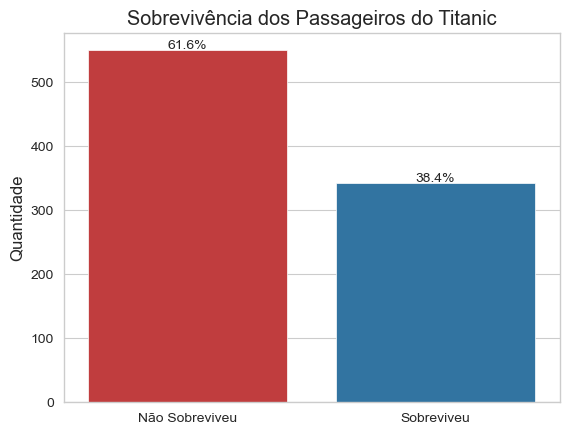

In [42]:
# Criar o gráfico de barras
sns.countplot(x='Survived', data=train_df, hue='Survived', palette=['tab:red', 'tab:blue'], legend=False)

# Adicionar rótulos com a quantidade e o percentual
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format(height/len(train_df)*100),
            ha="center")

# Personalizar os rótulos dos eixos
plt.xticks([0, 1], ['Não Sobreviveu', 'Sobreviveu'])
plt.xlabel('')  # Remover o rótulo do eixo x, pois já está nos ticks
plt.ylabel('Quantidade')

# Adicionar título
plt.title('Sobrevivência dos Passageiros do Titanic')

plt.show()

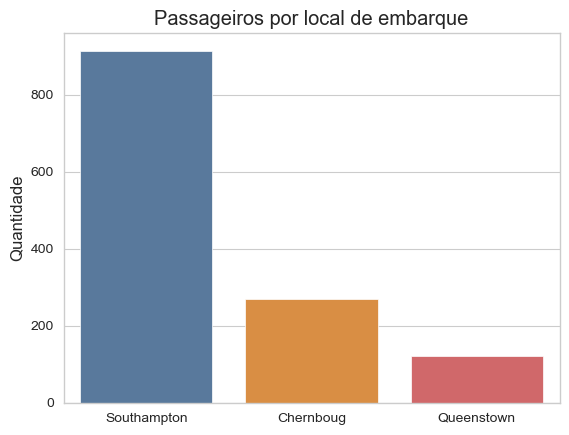

In [43]:
sns.barplot(x= full_df["Embarked"].value_counts().index, y = full_df["Embarked"].value_counts(), palette=['#4E79A7', '#F28E2B', '#E15759'], hue=full_df["Embarked"].value_counts().index, legend=False)

# Personalizar os rótulos dos eixos
plt.xticks(['S', 'C', 'Q'], ['Southampton', 'Chernboug', 'Queenstown'])
plt.xlabel('')  # Remover o rótulo do eixo x, pois já está nos ticks
plt.ylabel('Quantidade')

# Adicionar título
plt.title('Passageiros por local de embarque')

plt.show()

Interessantemente, a maior parte dos passageiros embarcou em Southampton.

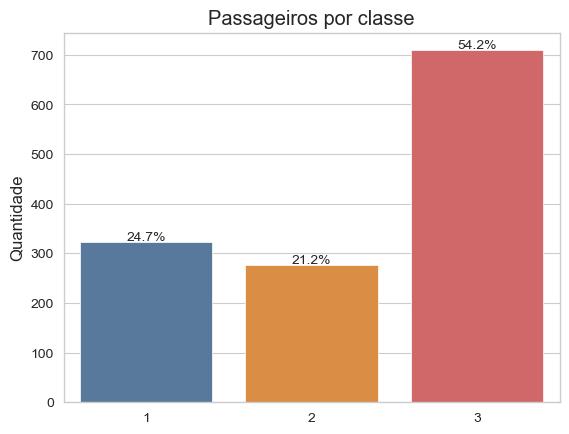

In [45]:
# analisando a distribuição por classe
sns.barplot(x= full_df["Pclass"].value_counts().index, y = full_df["Pclass"].value_counts(), palette=['#4E79A7', '#F28E2B', '#E15759'], hue=full_df["Pclass"].value_counts().index, legend=False)

# Personalizar os rótulos dos eixos
plt.xlabel('')  # Remover o rótulo do eixo x, pois já está nos ticks
plt.ylabel('Quantidade')

# Adicionar rótulos com a quantidade e o percentual
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format(height/len(full_df)*100),
            ha="center")

# Adicionar título
plt.title('Passageiros por classe')

plt.show()

Como podemos ver, a quantidade de passageiros da 3ª classe é maior do que das duas outras classes juntas.

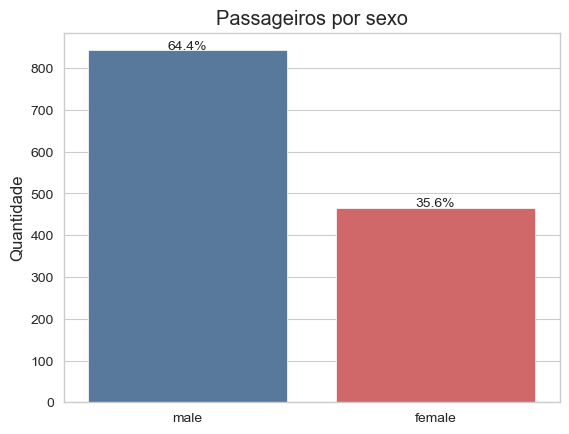

In [47]:
# analisando a distribuição por sexo
sns.barplot(x= full_df["Sex"].value_counts().index, y = full_df["Sex"].value_counts(), palette=['#4E79A7', '#E15759'], hue=full_df["Sex"].value_counts().index, legend=False)

# Personalizar os rótulos dos eixos
plt.xlabel('')  # Remover o rótulo do eixo x, pois já está nos ticks
plt.ylabel('Quantidade')

# Adicionar rótulos com a quantidade e o percentual
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format(height/len(full_df)*100),
            ha="center")

# Adicionar título
plt.title('Passageiros por sexo')

plt.show()

A quantidade de pessoas do sexo masculino é quase o dobro das pessoas do sexo feminino.

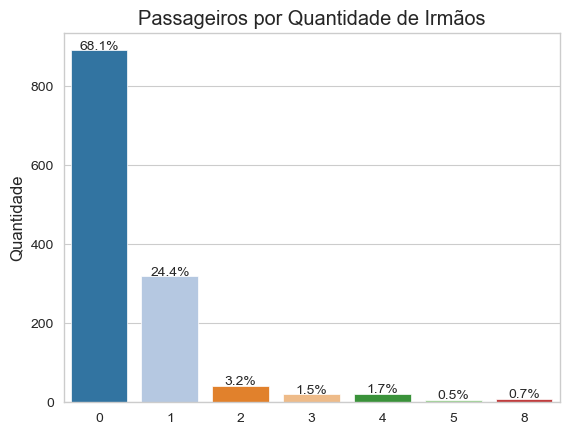

In [49]:
# analisando a distribuição por Siblings
sns.barplot(x= full_df["SibSp"].value_counts().index, y = full_df["SibSp"].value_counts(), palette='tab20', hue=full_df["SibSp"].value_counts().index, legend=False)

# Personalizar os rótulos dos eixos
plt.xlabel('')  # Remover o rótulo do eixo x, pois já está nos ticks
plt.ylabel('Quantidade')

# Adicionar rótulos com a quantidade e o percentual
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format(height/len(full_df)*100),
            ha="center")

# Adicionar título
plt.title('Passageiros por Quantidade de Irmãos')

plt.show()

No geral, as pessoas estavam sozinhas ou com mais um acompanhante.

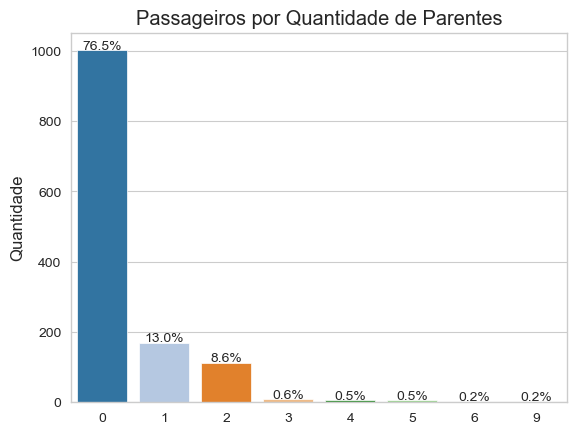

In [51]:
# analisando a distribuição por Parch
sns.barplot(x= full_df["Parch"].value_counts().index, y = full_df["Parch"].value_counts(), palette='tab20', hue=full_df["Parch"].value_counts().index, legend=False)

# Personalizar os rótulos dos eixos
plt.xlabel('')  # Remover o rótulo do eixo x, pois já está nos ticks
plt.ylabel('Quantidade')

# Adicionar rótulos com a quantidade e o percentual
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.1f}%'.format(height/len(full_df)*100),
            ha="center")

# Adicionar título
plt.title('Passageiros por Quantidade de Parentes')

plt.show()    

Novamente, podemos ver que a grande maioria dos passageiros estavam sozinhos. 

#### Analisando o atributo AGE

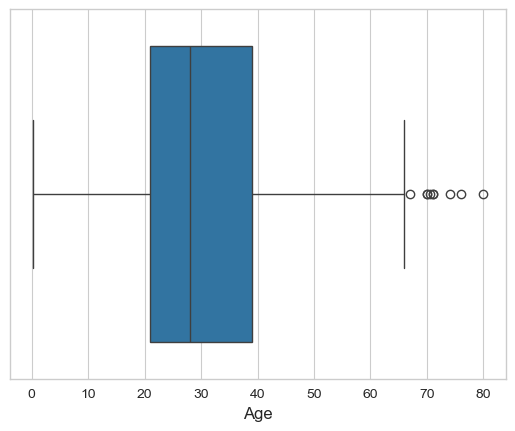

In [54]:
# traça boxplot do atributo Age
sns.boxplot(full_df["Age"], orient= "h");

Primeiras impressões: os dados apresentados no gráfico acima apresentam possíveis outliers

In [56]:
# descreve o atributo age
full_df["Age"].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

Apesar da baixa frequencia de pessoas com idade avançada ou muito jovens, isto não é suficiente para caracterizar que sejam outliers.

<hr>

#### Dados Ausentes

Antes de iniciarmos essa etapa, vale a pena descrever os tipos de mecanismos de dados faltantes, de forma a compreendermos quais ações a serem tomadas quando da existência da ausência de dados em nossos *datasets*. Abaixo, segue os principais mecanismos e suas descrições:

a) **MCAR – Missing Completely At Random** : significa que não há relação entre a falta de dados e quaisquer valores, observados ou ausentes. Esses pontos de dados ausentes são um subconjunto aleatório dos dados. Não há nada sistemático acontecendo que torne alguns dados mais prováveis ​​de serem perdidos do que outros.

b) **MAR – Missing At Random (Perdidos Aleatoriamente)** : significa que há uma relação sistemática entre a propensão de valores ausentes e os dados observados , mas não os dados ausentes. 

c) **MNAR – Missing Not At Random** : significa que há uma relação entre a propensão de um valor estar ausente e seus valores. Este é um caso em que as pessoas com menor escolaridade não têm acesso aos estudos ou as pessoas mais doentes têm maior probabilidade de desistir do estudo. 

In [59]:
# Contando os valores ausentes em cada coluna
missing_values = full_df.isnull().sum()

# Calculando a porcentagem de valores ausentes em cada coluna
total_rows = len(full_df)
percent_missing = round((missing_values / total_rows) * 100, 2)

# Criando um DataFrame com os resultados
missing_data = pd.DataFrame({'Atributo': missing_values.index,
                             'Qtd. Ausentes': missing_values.values,
                             '%': percent_missing.values})

# Exibindo a tabela no Jupyter Notebook
display(HTML("<b>Atributos com dados ausentes</b>"))
display(missing_data[missing_data['Qtd. Ausentes']>0].sort_values(by='Qtd. Ausentes', ascending=False))

,Atributo,Qtd. Ausentes,%
10,Cabin,1014,77.46
1,Survived,418,31.93
5,Age,263,20.09
11,Embarked,2,0.15
9,Fare,1,0.08


Sabemos que a base de teste possui 418 registros, então não é surpresa que a coluna Survived apresente 418 registros nulos.  

A informação sobre a **Cabin** é a que possui o maior número de informações faltantes, com mais de 77%. Após, a coluna **Age** não possui valor em aproximadamente 20% dos passageiros, a coluna informando o Porto de embarque (**Embarked**) possui apenas 2% de informações faltantes e a coluna da tarifa (**Fare**) está ausente em apenas 1 dos registros.  

### Corrigindo alguns dados

#### Corrigindo o registro sem tarifa

In [63]:
# visualizando o registro sem tarifa.
full_df[full_df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Origin
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Teste


Podemos ver que o registro sem a tarifa é o registro do Sr. Thomas Storey, de 60 anos, do sexo masculino, que embarcou em Southampton, com um bilhete de 3ª classe.  

Seria razoável preencher o valor da tarifa com a mediana.

Entretanto, vamos observar como as colunas se relacionam

(5.0, 0.0)

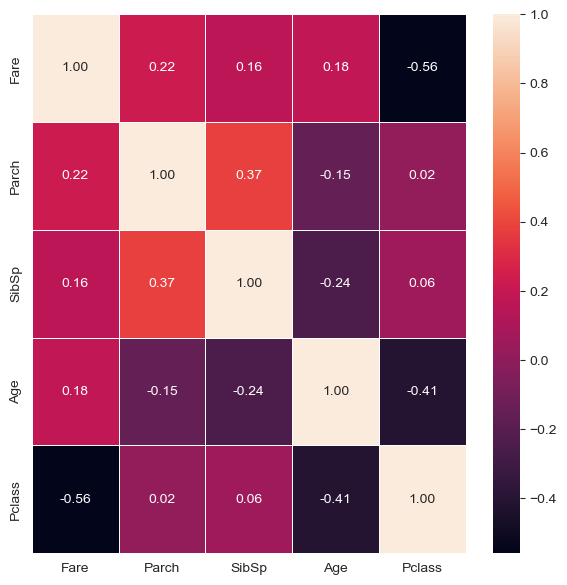

In [65]:
#Heatmap to observe correlation
f,ax = plt.subplots(figsize=(7, 7))
sns.heatmap(full_df[['Fare', 'Parch', 'SibSp', 'Age', 'Pclass']].corr(), annot=True, linewidths=0.5, fmt='.2f',ax=ax)
ax.set_ylim(5, 0)

In [66]:
full_df.groupby(['Pclass', 'Parch']).Fare.median()

Pclass  Parch
1       0         52.00000
        1         80.75415
        2        134.50000
        3        262.37500
        4        263.00000
2       0         13.00000
        1         26.00000
        2         30.00000
        3         23.00000
3       0          7.89580
        1         15.90000
        2         27.90000
        3         34.37500
        4         26.68335
        5         31.33125
        6         46.90000
        9         69.55000
Name: Fare, dtype: float64

Como podemos ver, o atributo Fare possui uma razoável relação com a Pclass, mas também com Parch e SibSp.
Já que o nosso passageiro é da classe 3 e viajava sem esposa e sem parentes, vamos utilizar a mediana considerando esta situação.

In [68]:
median_fare = full_df.groupby(['Pclass', 'Parch']).Fare.median()[3][0]

In [69]:
# como temos apenas um registro, podemos simplesmente preenchê-lo.
full_df['Fare'] = full_df['Fare'].fillna(median_fare)

In [70]:
display(full_df[full_df.PassengerId == 1044])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Origin
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,7.8958,NaN,S,Teste


#### Corrigindo os registros sem embarque

In [72]:
full_df[full_df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Origin
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Treino
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Treino


Temos 2 passageiros sem a indicação do embarque. Ambas estão na mesma cabine, tem o mesmo número de bilhete e são de primeira classe.
Ao invés de simplesmente atribuir o valor mais frequente de embarque, vamos analisar a distribuição do embarque por classe.

In [74]:
full_df[full_df['Pclass']==1].groupby(['Embarked'])['Embarked'].count()

Embarked
C    141
Q      3
S    177
Name: Embarked, dtype: int64

A maior parte dos passageiros da primeira classe são de Southampton. Então, vamos atribuir para estes registros o valor 'S'.

In [76]:
full_df['Embarked'] = full_df['Embarked'].fillna('S')

In [77]:
full_df[full_df['Ticket']=='113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Origin
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S,Treino
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S,Treino


#### Corrigindo as idades

In [79]:
full_df['Sex_cod']=full_df['Sex'].map({'male':0, 'female':1})
full_df['Embarked_cod']=full_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )

df_all_corr = full_df[['Survived', 'Pclass', 'Sex_cod', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_cod']].corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Coeficiente de Correlação'}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'Age']

,Feature 1,Feature 2,Coeficiente de Correlação
5,Age,Age,1.000000
12,Age,Pclass,0.408106
21,Age,SibSp,0.243699
28,Age,Fare,0.177280
32,Age,Parch,0.150917
47,Age,Survived,0.077221
51,Age,Sex_cod,0.063645
56,Age,Embarked_cod,0.047410


Podemos ver que a idade possui um índice de correlação alto com a classe. Isto significa que podemos utilizar a classe para ajustar as métricas da idade.

In [81]:
print('Mediana da idade de todos os passageiros: {}'.format(full_df['Age'].median()))

age_by_pclass_sex = full_df.groupby(['Sex', 'Pclass']).Age.median()
for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Mediana da idade da classe {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))

Mediana da idade de todos os passageiros: 28.0
Mediana da idade da classe 1 females: 36.0
Mediana da idade da classe 1 males: 42.0
Mediana da idade da classe 2 females: 28.0
Mediana da idade da classe 2 males: 29.5
Mediana da idade da classe 3 females: 22.0
Mediana da idade da classe 3 males: 25.0


Para ser um pouco mais criterioso, vamos utlizar o sexo como um segundo nível de agrupamento, pois há uma diferença razoável nestes valores.

In [83]:
for pclass in range(1, 4):
    for sex in ['female', 'male']:
        full_df.loc[(full_df['Age'].isna()) & (full_df['Sex']==sex) & (full_df['Pclass']==pclass), 'Age']=age_by_pclass_sex[sex][pclass]

<Axes: >

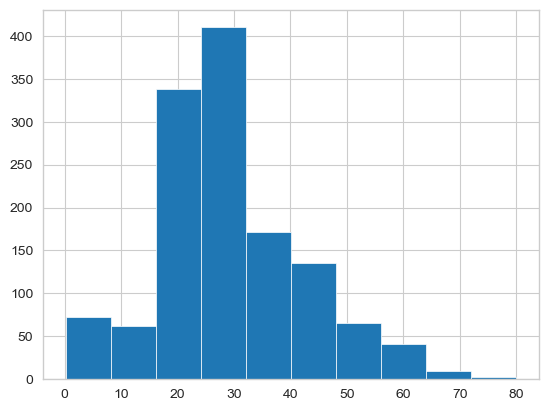

In [84]:
full_df.Age.hist()

#### Cabine


A cabine é um pouco complicada e precisa de mais análise.  
Grande parte da coluna **Cabin** está faltando, mas o dado em si não pode ser completamente ignorado porque algumas cabines podem ter taxas de sobrevivência mais altas.  
Acontece que a primeira letra dos valores da Cabine são os conveses (decks) em que as cabines estão localizadas.  
Esses conveses eram separados principalmente para uma classe de passageiros, mas alguns deles eram usados ​​por várias classes de passageiros.  

<img src="https://vignette.wikia.nocookie.net/titanic/images/f/f9/Titanic_side_plan.png/revision/latest?cb=20180322183733">

In [86]:
full_df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

No navio, os conveses eram 6, rotulados com T, U, W, X, Y, Z mas apenas o valor T está presente no dataset.  
Os decks A, B e C eram reservados para os passageiros da primeira classe.    
Os decks D e E eram utilizados por todas as classes.  
Os decks F e G eram destinados a passageiros da segunda e terceira classe.  

É importante observar que a partir do deck A até o G, a distância para as escadas aumenta, o que pode ter sido um fator relacionado à sobrevivência.

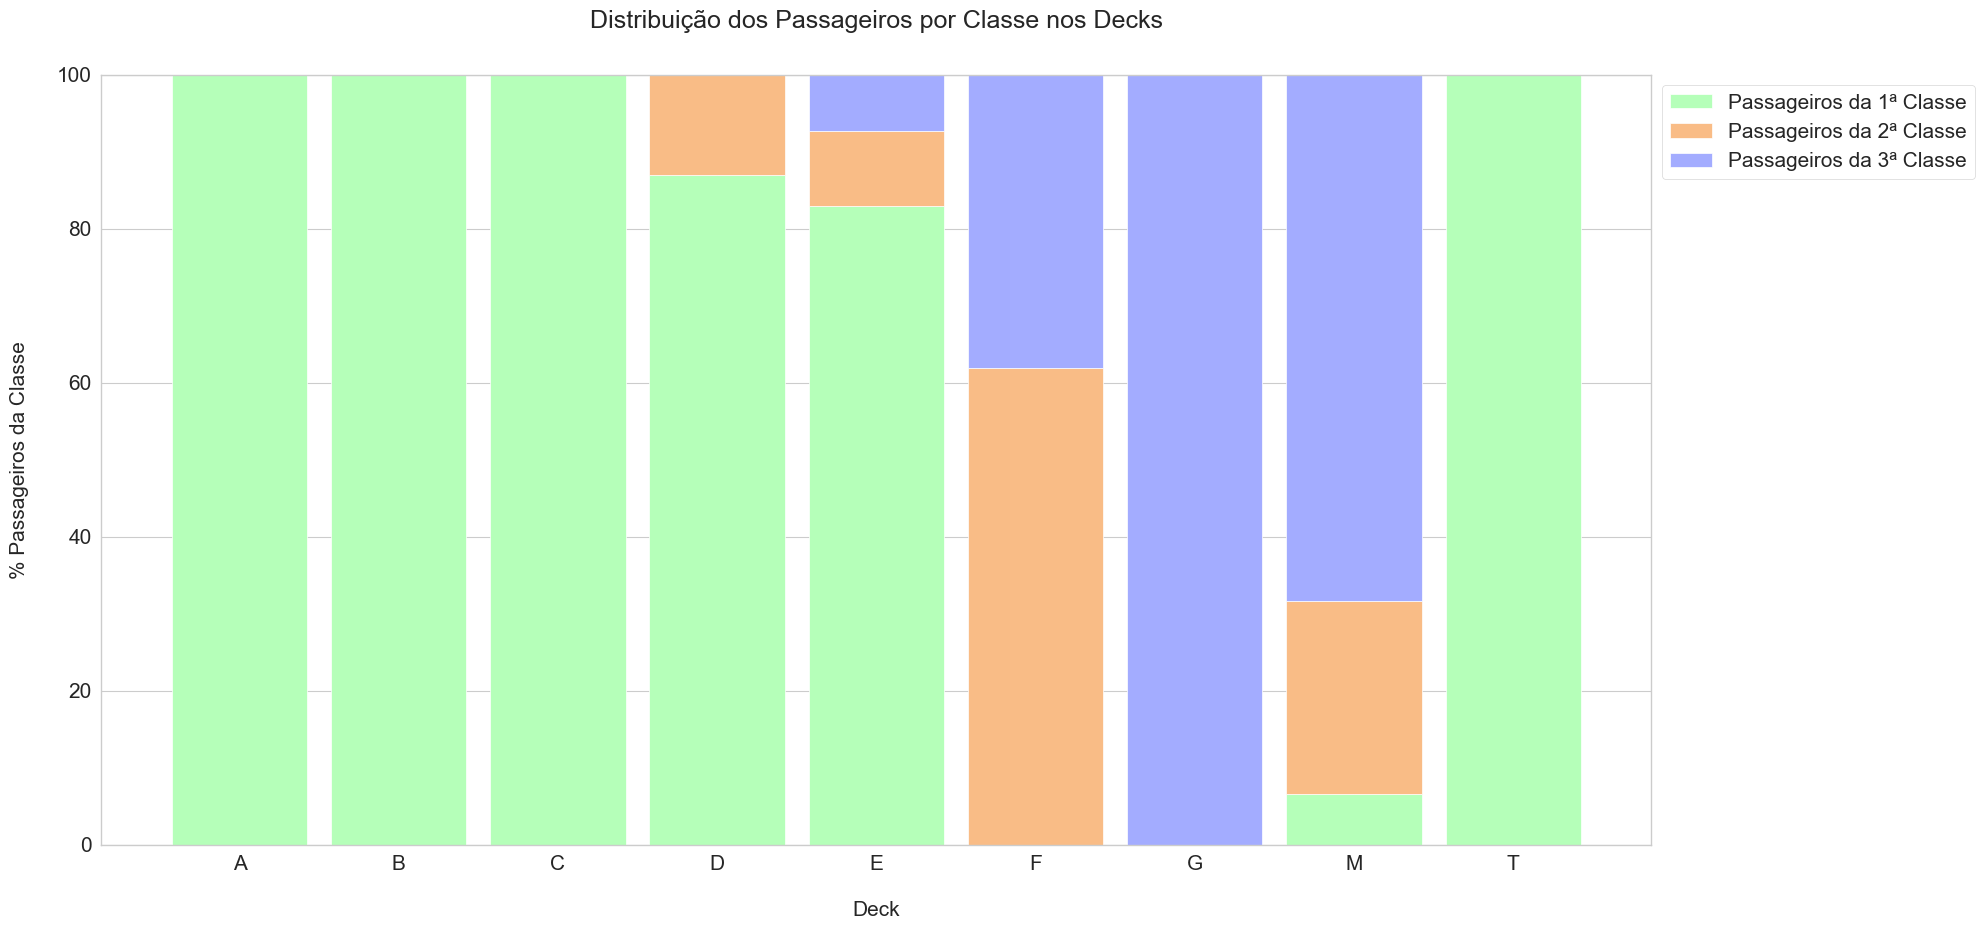

In [88]:
# criando a variável Deck
full_df['Deck'] = full_df['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

df_all_decks = full_df.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 
                                                                        'Fare', 'Embarked', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name': 'Count'}).transpose()

def get_pclass_dist(df):
    
    # Creating a dictionary for every passenger class count in every deck
    deck_counts = {'A': {}, 'B': {}, 'C': {}, 'D': {}, 'E': {}, 'F': {}, 'G': {}, 'M': {}, 'T': {}}
    decks = df.columns.levels[0]    
    
    for deck in decks:
        for pclass in range(1, 4):
            try:
                count = df[deck][pclass][0]
                deck_counts[deck][pclass] = count 
            except KeyError:
                deck_counts[deck][pclass] = 0
                
    df_decks = pd.DataFrame(deck_counts)    
    deck_percentages = {}

    # Creating a dictionary for every passenger class percentage in every deck
    for col in df_decks.columns:
        deck_percentages[col] = [(count / df_decks[col].sum()) * 100 for count in df_decks[col]]
        
    return deck_counts, deck_percentages

def display_pclass_dist(percentages):
    
    df_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M', 'T')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85
    
    pclass1 = df_percentages[0]
    pclass2 = df_percentages[1]
    pclass3 = df_percentages[2]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, pclass1, color='#b5ffb9', edgecolor='white', width=bar_width, label='Passageiros da 1ª Classe')
    plt.bar(bar_count, pclass2, bottom=pclass1, color='#f9bc86', edgecolor='white', width=bar_width, label='Passageiros da 2ª Classe')
    plt.bar(bar_count, pclass3, bottom=pclass1 + pclass2, color='#a3acff', edgecolor='white', width=bar_width, label='Passageiros da 3ª Classe')

    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('% Passageiros da Classe', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Distribuição dos Passageiros por Classe nos Decks', size=18, y=1.05)   
    
    plt.show()    

all_deck_count, all_deck_per = get_pclass_dist(df_all_decks)
display_pclass_dist(all_deck_per)

100% dos decks A, B e C são passageiros de 1ª classe.  
O convés D tem 87% de passageiros de 1ª classe e 13% de passageiros de 2ª classe.  
O convés E tem 83% de passageiros de 1ª classe, 10% de 2ª classe e 7% de passageiros de 3ª classe.  
O convés F tem 62% de passageiros de 2ª classe e 38% de passageiros de 3ª classe.  
100% dos passageiros do convés G são passageiros da 3ª classe.  
Há apenas uma pessoa no convés do barco na cabine T e ele é passageiro de 1ª classe.  
O passageiro da cabine T tem a maior semelhança com os passageiros do convés A, então ele é agrupado com o convés A.  
Os passageiros rotulados como M são os valores ausentes no recurso Cabine. É razoável dizer que não seja possível encontrar o deck real desses passageiros, então a decisão foi utilizar M (missing) como deck.

In [90]:
# Trocando o deck do passageiro da cabine "T".
full_df.loc[full_df['Deck']=='T', 'Deck'] = 'A'

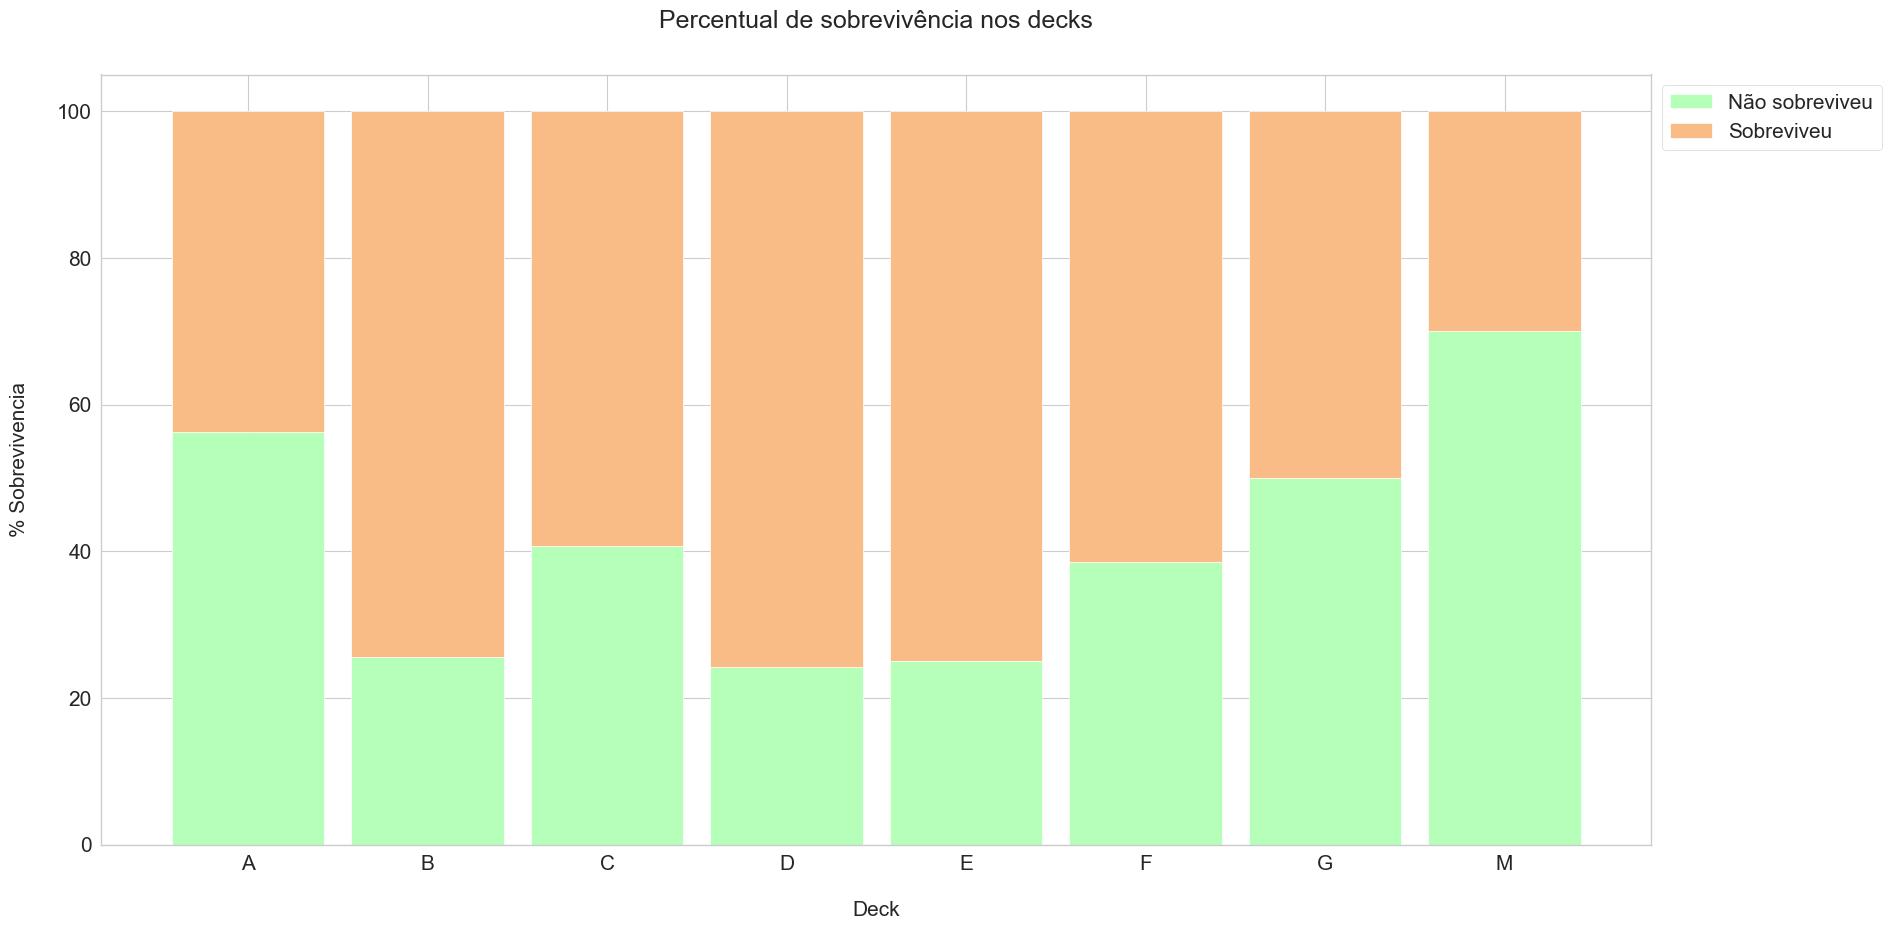

In [91]:
df_all_decks_survived = full_df.groupby(['Deck', 'Survived']).count().drop(columns=['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 
                                                                                   'Embarked', 'Pclass', 'Cabin', 'PassengerId', 'Ticket']).rename(columns={'Name':'Count'}).transpose()

def get_survived_dist(df):
    
    # Creating a dictionary for every survival count in every deck
    surv_counts = {'A':{}, 'B':{}, 'C':{}, 'D':{}, 'E':{}, 'F':{}, 'G':{}, 'M':{}}
    decks = df.columns.levels[0]    

    for deck in decks:
        for survive in range(0, 2):
            surv_counts[deck][survive] = df[deck][survive][0]
            
    df_surv = pd.DataFrame(surv_counts)
    surv_percentages = {}

    for col in df_surv.columns:
        surv_percentages[col] = [(count / df_surv[col].sum()) * 100 for count in df_surv[col]]
        
    return surv_counts, surv_percentages

def display_surv_dist(percentages):
    
    df_survived_percentages = pd.DataFrame(percentages).transpose()
    deck_names = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'M')
    bar_count = np.arange(len(deck_names))  
    bar_width = 0.85    

    not_survived = df_survived_percentages[0]
    survived = df_survived_percentages[1]
    
    plt.figure(figsize=(20, 10))
    plt.bar(bar_count, not_survived, color='#b5ffb9', edgecolor='white', width=bar_width, label="Não sobreviveu")
    plt.bar(bar_count, survived, bottom=not_survived, color='#f9bc86', edgecolor='white', width=bar_width, label="Sobreviveu")
 
    plt.xlabel('Deck', size=15, labelpad=20)
    plt.ylabel('% Sobrevivencia', size=15, labelpad=20)
    plt.xticks(bar_count, deck_names)    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), prop={'size': 15})
    plt.title('Percentual de sobrevivência nos decks', size=18, y=1.05)
    
    plt.show()

all_surv_count, all_surv_per = get_survived_dist(df_all_decks_survived)
display_surv_dist(all_surv_per)

In [92]:
# Analisar a probabilidade de sobrevivência pelo Sexo
train_df[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


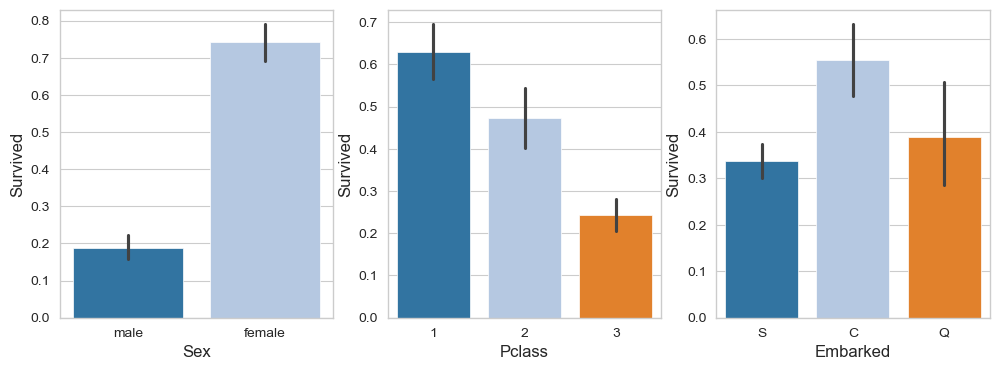

In [93]:
# Plotar os gráficos para Survived vs. Sex, Pclass e Embarked
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='Sex', y='Survived', data=train_df, ax=axis1, palette='tab20', hue='Sex', legend=False)
sns.barplot(x='Pclass', y='Survived', data=train_df, ax=axis2, palette='tab20', hue='Pclass', legend=False)
sns.barplot(x='Embarked', y='Survived', data=train_df, ax=axis3, palette='tab20', hue='Embarked', legend=False);

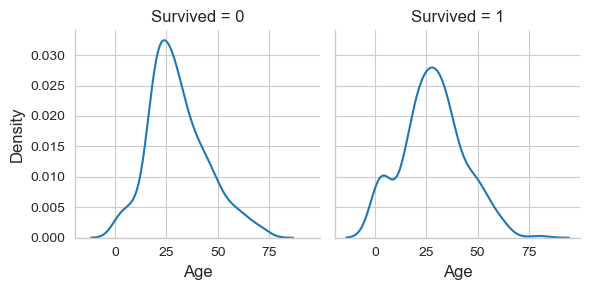

In [94]:
# ver influência da idade na probabilidade de sobrevivência
age_survived = sns.FacetGrid(train_df, col='Survived')
age_survived.map(sns.kdeplot, 'Age')

<hr>

## Etapa 3 - Data Preparation

In [96]:
# cria o recurso Cat_Fare
full_df['Cat_fare'] = pd.qcut(full_df['Fare'], 4, labels=[0,1,2,3]).astype(int)

In [97]:
# cria o recurso cat_age
# Para isto, vamos considerar:
# - crianças - 0 a 14 anos
# - adolescentes 14 a 20 anos
# - adulto jovem 20 a 35 anos
# - adulto maduro 35 a 50 anos
# - senior acima de 50 anos 
full_df['Cat_age'] = pd.cut(full_df['Age'], bins=[0, 14, 20, 35, 50, 100], labels=[0,1,2,3,4]).astype(int)

In [98]:
# cria o recurso familysize e isalone
full_df['Family_size'] = full_df['Parch'] + full_df['SibSp'] + 1
full_df['Is_alone'] = full_df['Family_size'].map( lambda s : 1 if s == 1 else 0 )

In [99]:
full_df['Title'] =  full_df['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [100]:
full_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [101]:
# ajusta alguns títulos e remove outros
full_df['Title'] = full_df['Title'].replace(['Lady', 'the Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
full_df['Title'] = full_df['Title'].replace('Mlle', 'Miss')
full_df['Title'] = full_df['Title'].replace('Ms', 'Miss')
full_df['Title'] = full_df['Title'].replace('Mme', 'Mrs')

In [102]:
full_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

<hr>

### Análise de Hipóteses

**Hipótese 1:** Precisamos começar a olhar para qualquer relação entre as características e a sobrevivência dos passageiros.  
Para começar, vamos verificar a relação de idade (por sexo) e a sobrevivência porque acredita-se que "alguns grupos de pessoas tinham mais probabilidade de sobreviver do que outros, como mulheres, crianças e a classe alta".  


In [105]:
# cria função plot para apresentar distribuição
def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col, palette='tab20' )
    facet.map( sns.kdeplot , var , fill= True)
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

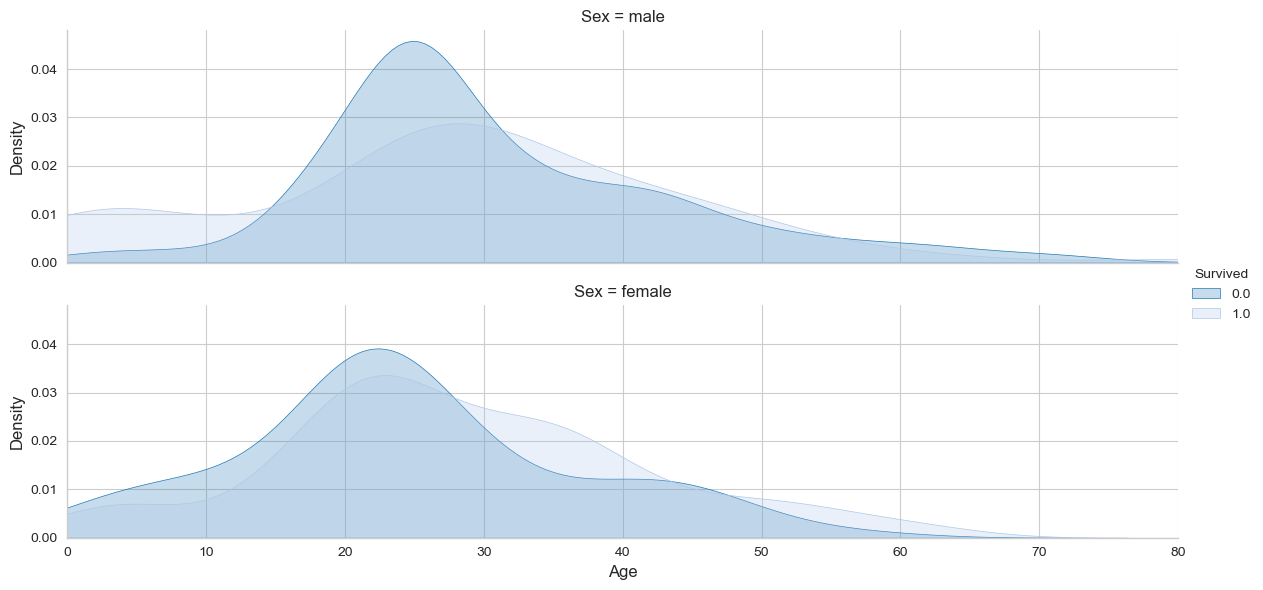

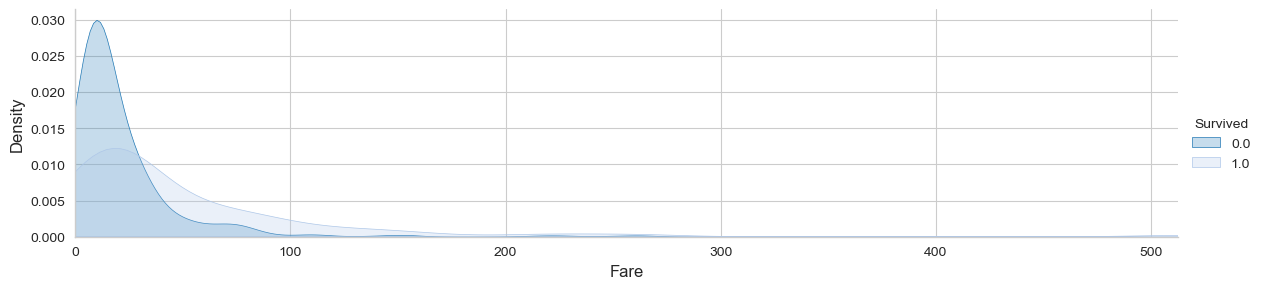

In [106]:
# plotando a distribuição de idades com quem sobreviveu e não sobreviveu
plot_distribution( full_df , var = 'Age' , target = 'Survived' , row = 'Sex' )
plot_distribution( full_df , var = 'Fare' , target = 'Survived' )

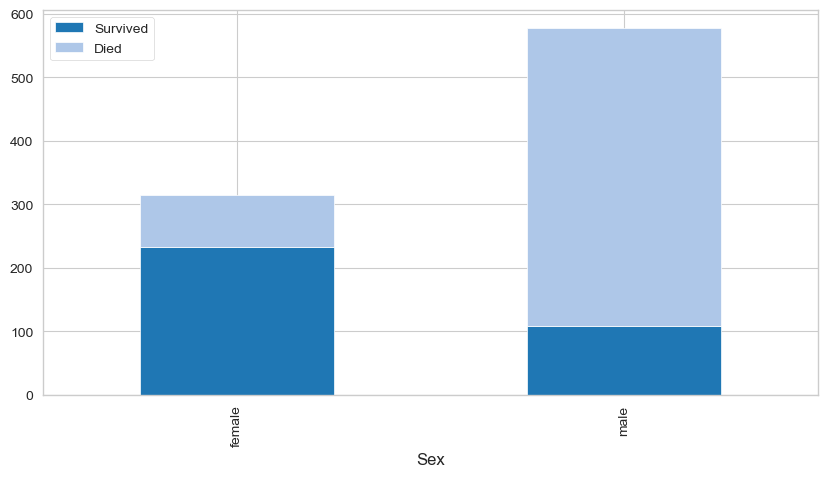

In [107]:
# plotando outro gráfico para análise da suposição 1 em train
train_df['Died'] = 1 - train_df['Survived']
train_df.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True);

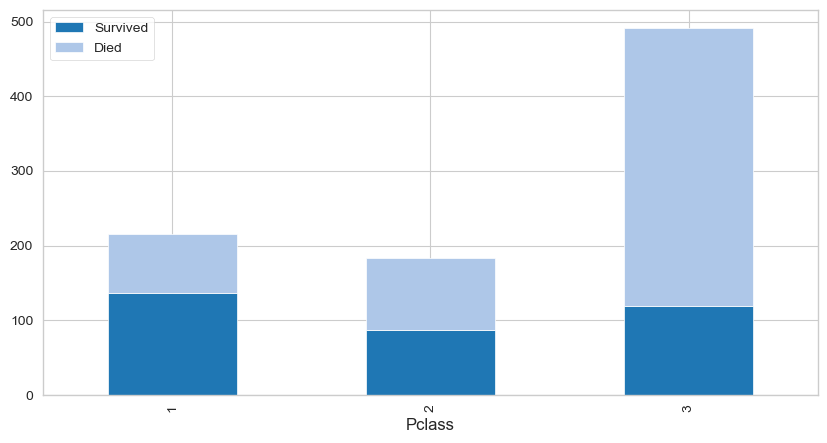

In [108]:
# plotando outro gráfico para análise da suposição 1 em train
train_df.groupby('Pclass').agg('sum')[['Survived', 'Died']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True);

**Observação**: observando os gráficos acima, podemos criar algumas deduções sobre quais características têm correlação direta com a sobrevivência. Portanto, é perceptível que os homens mais jovens, as mulheres mais velhas, valor de pclass mais baixo (então classe mais alta) possuem maiores chances de sobrevivência. Ao contrário das pessoas que pagaram por tarifas mais baixas, pois estas possuem maiores chances de não sobreviver.


In [110]:
# cria função plot para apresentar variáveis categóricas
def plot_cat( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()


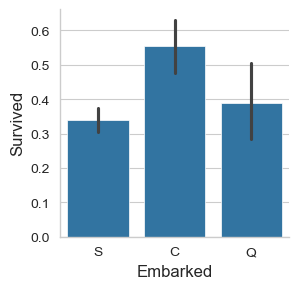

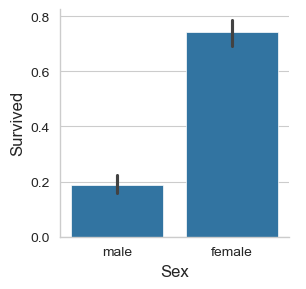

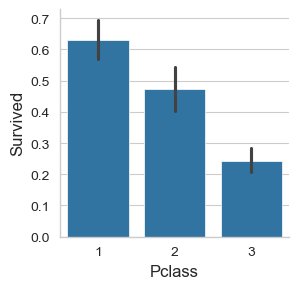

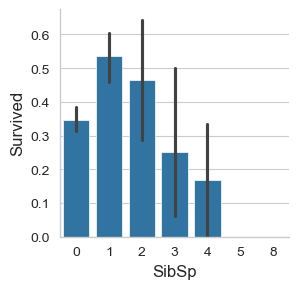

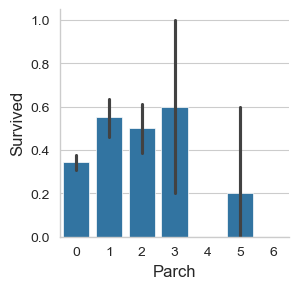

In [111]:
# plota taxa de sobrevivência em relação ao atributo embarked
plot_cat( full_df[full_df['Origin']=='Treino'] , cat = 'Embarked' , target = 'Survived')
plot_cat( full_df[full_df['Origin']=='Treino'] , cat = 'Sex' , target = 'Survived')
plot_cat( full_df[full_df['Origin']=='Treino'] , cat = 'Pclass' , target = 'Survived' )
plot_cat( full_df[full_df['Origin']=='Treino'] , cat = 'SibSp' , target = 'Survived')
plot_cat( full_df[full_df['Origin']=='Treino'] , cat = 'Parch' , target = 'Survived')

<hr>

**Hipótese 3** : Há mais chance de sobreviver, se você viajar em 2 a 4 pessoas do que viajar sozinho ou em mais de 4 pessoas?

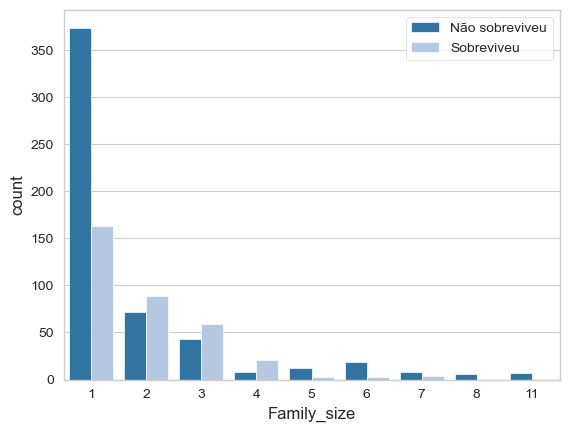

In [113]:
g=sns.countplot(hue="Survived", data=full_df, x='Family_size')
plt.legend(title='', loc='upper right', labels=['Não sobreviveu', 'Sobreviveu'])
plt.show(g)

**Observação**: como podemos ver no gráfico acima, os grupos de 2 a 4 pessoas tiveram maior taxa de sobrevivência.

<hr>

## Etapa 4 - Modeling


### Seleção dos atributos de interesse  

Quanto mais recursos um modelo tiver, mais sensível ele será a erros devido à variação. Assim, queremos selecionar os recursos mínimos necessários para produzir um modelo válido.

Uma abordagem comum para eliminar recursos é eliminar aqueles que são menos importantes para o modelo.

A seleção de recursos pode ser feita de várias maneiras, mas existem 3 categorias:  

- Método de filtro  

- Método envoltório  

- Método incorporado  

Nesta etapa, vamos selecionar os atributos que serão mais importantes para a construção do nosso modelo de predição. 

In [116]:
# carregamento das bibliotecas iniciais

# Modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier)

# Sklearn suports
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer
from sklearn.feature_selection import RFE

# Outras bibliotecas de interesse
from yellowbrick.model_selection import FeatureImportances
from sklearn.linear_model import LassoCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

In [117]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   1309 non-null   int64  
 1   Survived      891 non-null    float64
 2   Pclass        1309 non-null   int64  
 3   Name          1309 non-null   object 
 4   Sex           1309 non-null   object 
 5   Age           1309 non-null   float64
 6   SibSp         1309 non-null   int64  
 7   Parch         1309 non-null   int64  
 8   Ticket        1309 non-null   object 
 9   Fare          1309 non-null   float64
 10  Cabin         295 non-null    object 
 11  Embarked      1309 non-null   object 
 12  Origin        1309 non-null   object 
 13  Sex_cod       1309 non-null   int64  
 14  Embarked_cod  1309 non-null   int64  
 15  Deck          1309 non-null   object 
 16  Cat_fare      1309 non-null   int32  
 17  Cat_age       1309 non-null   int32  
 18  Family_size   1309 non-null   int6

In [118]:
full_df.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

**Primeira Solução : Método de Filtro**

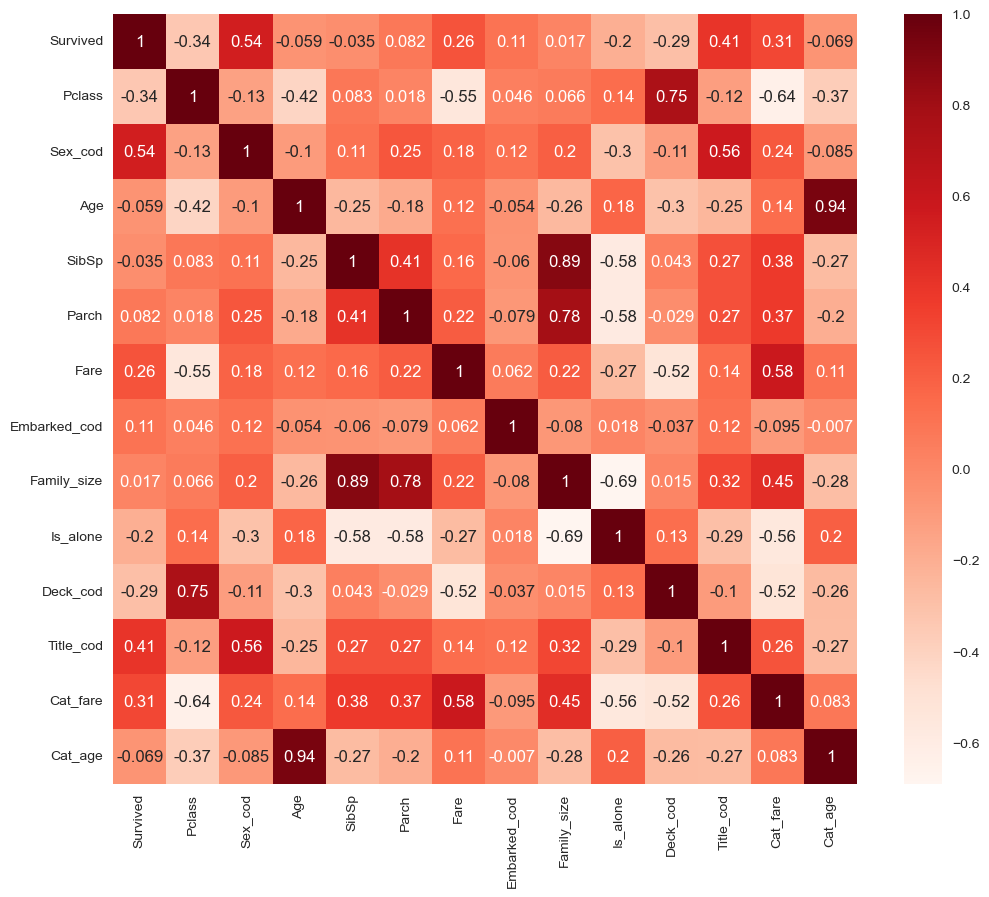

In [120]:
full_df['Deck_cod']=full_df['Deck'].map({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'M':7})
full_df['Title_cod']=full_df['Title'].map({'Mr':0, 'Mrs':1, 'Miss':2, 'Master':3, 'Rare':4})

# gerando a correlação entre os atributos usando a correlação de Pearson
plt.figure (figsize = (12,10)) 
cor = full_df[full_df['Origin']=='Treino'][['Survived', 'Pclass', 'Sex_cod', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked_cod', 'Family_size', 'Is_alone', 'Deck_cod', 'Title_cod', 'Cat_fare', 'Cat_age']].corr () 
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds) 
plt.show ()

In [121]:
# Correlação com a variável alvo 
cor_target = abs(cor["Survived"])
# Selecionando recursos altamente correlacionados, acima de 0.3
relevant_features = cor_target[cor_target> 0.3] 
relevant_features

Survived     1.000000
Pclass       0.338481
Sex_cod      0.543351
Title_cod    0.405921
Cat_fare     0.306855
Name: Survived, dtype: float64

**Observação** : O primeiro método sugere a manutenção dos atributos *pclass*, *sex*, *Title* e *Cat_fare*. 

**Segunda Solução** : Método *Embedded*

In [124]:
X = full_df[full_df['Origin']=='Treino'][['Pclass', 'Sex_cod', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_cod', 'Family_size', 'Is_alone', 'Deck_cod', 'Title_cod', 'Cat_fare', 'Cat_age']]   
y = full_df[full_df['Origin']=='Treino']["Survived"]

reg = LassoCV()
reg.fit(X, y)
print("Melhor alpha usando LassoCV: %f" % reg.alpha_)
print("Melhor score usando LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Melhor alpha usando LassoCV: 0.006215
Melhor score usando LassoCV: 0.414866


In [125]:
print("Lasso escolheu " + str(sum(coef != 0)) + " variáveis e eliminou as outras " +  str(sum(coef == 0)) + " variáveis")

Lasso escolheu 11 variáveis e eliminou as outras 2 variáveis


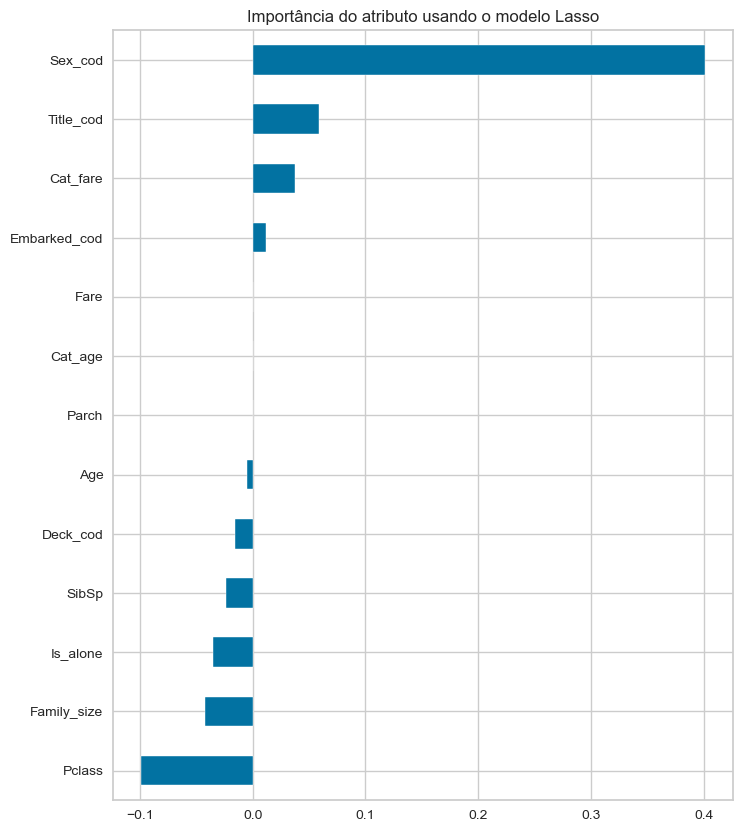

In [126]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Importância do atributo usando o modelo Lasso");

**Observação:** O segundo método sugere a eliminação das variáveis *Cat_Fare*, *Fare* e *Parch*.

**Terceira Solução** Extra Tree Classifier

Text(0.5, 1.0, 'Importância dos atributos usando Extra Trees Classifier')

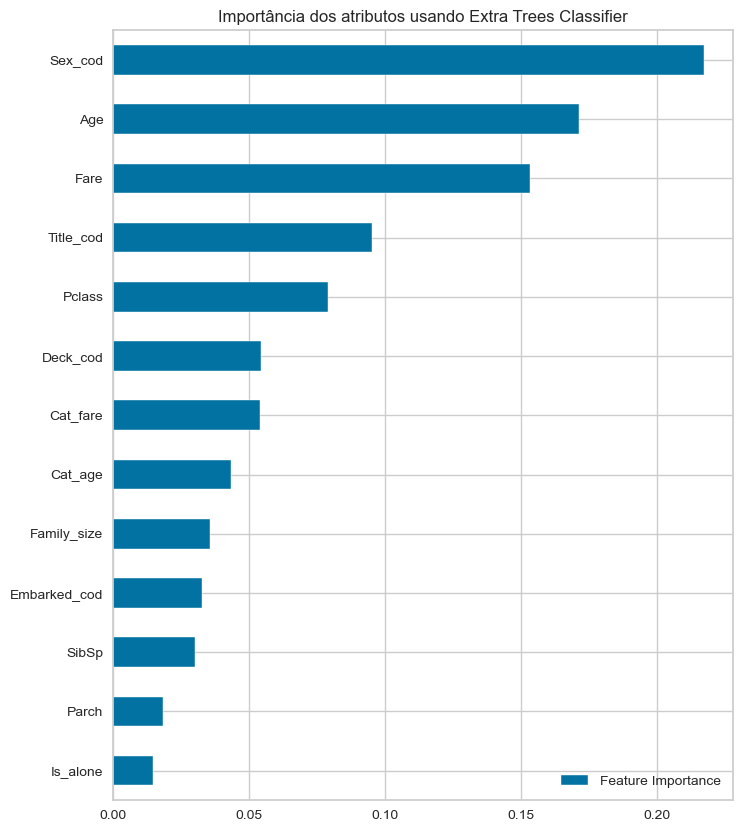

In [129]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
result = pd.DataFrame(data=clf.feature_importances_, index=clf.feature_names_in_, columns=['Feature Importance'])
result.sort_values(by=['Feature Importance'], ascending=True, inplace=True)

result.plot(kind = "barh")
plt.title("Importância dos atributos usando Extra Trees Classifier")

**Observação:** Os atributos is_alone, Parch, SibSp, Embarked e Family_size possuem baixa importância.


**Conclusão:** Através das diversas técnicas, podemos notar que os atributos Sexo, Titulo e Pclass, recorrentemente apareceram. Conclue-se que eles tem a maior representatividades para efeito do classificador.

<hr>

#### Criando os datasets de treino e teste

In [133]:
# recriando os dataframes de treino e teste
train_df = full_df[full_df['Origin']=='Treino'][['PassengerId', 'Pclass', 'Name', 'Sex_cod', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 
                                                 'Cabin', 'Embarked_cod', 'Family_size', 'Is_alone', 'Cat_fare', 'Cat_age', 'Deck_cod', 'Title_cod', 'Survived']]   
test_df = full_df[full_df['Origin']=='Teste'][['PassengerId', 'Pclass', 'Name', 'Sex_cod', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 
                                                 'Cabin', 'Embarked_cod', 'Family_size', 'Is_alone', 'Cat_fare', 'Cat_age', 'Deck_cod', 'Title_cod']]   


In [134]:
# criando os dataframes de treino e teste dos modelos
np.random.seed(42) # definindo uma semente global

X = train_df[['Pclass', 'Sex_cod', 'Age', 'Fare', 'Embarked_cod', 'Family_size', 'Deck_cod', 'Title_cod']]   
y = train_df["Survived"]

Test = test_df[['Pclass', 'Sex_cod', 'Age', 'Fare', 'Embarked_cod', 'Family_size', 'Deck_cod', 'Title_cod']]

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(712, 8) (712,)
(179, 8) (179,)


In [135]:
# Feature Scaling
# Usaremos o standardscaler to transformar os dados
sc = StandardScaler()

## transforming "train_x"
x_train = sc.fit_transform(x_train)
## transforming "test_x"
x_test = sc.transform(x_test)

## transforming "The testset"
Test = sc.transform(Test)

In [136]:
# Testando os modelos

# Parâmetros
num_folds = 5
scoring = 'accuracy'

# Criação dos modelos
#xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

models = []
models.append(('LR', LogisticRegression(solver='newton-cg')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('AdaB', AdaBoostClassifier()))
models.append(('GradB', GradientBoostingClassifier()))

In [137]:
# Avaliação dos modelos
model_results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    model_results.append(cv_results)
    names.append(name)
#cv_results.mean(), cv_results.std()

In [138]:
results = pd.DataFrame(columns=['Name', 'Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5','Acurácia Média', 'Desvio Padrão'])
results['Name']=names
for i in range(8):
    for j in range(5):
        results.loc[i, f'Fold {j+1}']=model_results[i][j]
    results.loc[i, 'Acurácia Média']=model_results[i].mean()
    results.loc[i, 'Desvio Padrão']=model_results[i].std()
        
results.sort_values(by='Acurácia Média', ascending=False)

,Name,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Acurácia Média,Desvio Padrão
7,GradB,0.804196,0.846154,0.809859,0.830986,0.838028,0.825845,0.016196
5,RFC,0.797203,0.839161,0.809859,0.809859,0.866197,0.824456,0.02501
4,SVM,0.811189,0.867133,0.802817,0.78169,0.84507,0.82158,0.030588
6,AdaB,0.818182,0.86014,0.795775,0.788732,0.809859,0.814538,0.025031
1,KNN,0.804196,0.825175,0.788732,0.788732,0.859155,0.813198,0.026584
0,LR,0.804196,0.832168,0.795775,0.725352,0.838028,0.799104,0.040211
2,CART,0.797203,0.755245,0.788732,0.774648,0.767606,0.776687,0.014916
3,NB,0.79021,0.811189,0.767606,0.704225,0.78169,0.770984,0.036246


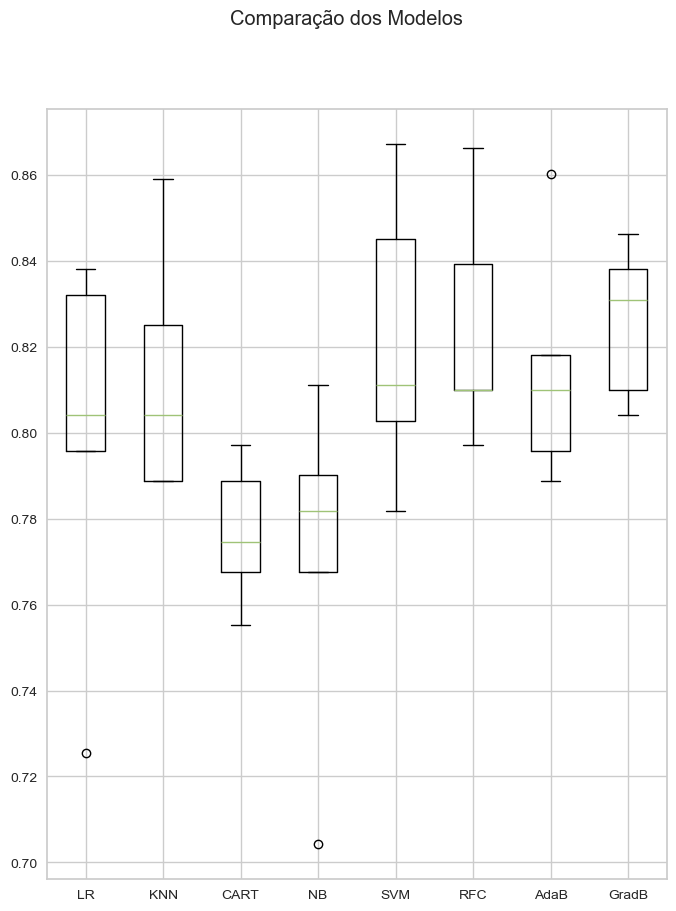

In [139]:
# Comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(model_results)
ax.set_xticklabels(names)
plt.show()

**Observação:** Concluímos que os modelos Gradient Boosting, SVM são os mais promissores.  
Poderíamos fazer o ajuste fino dos hiperparâmetros dos modelos para obtermos melhores resultados, contudo, este não é o objetivo deste notebook.  
Assim, vamos seguir com a geração dos dados de teste para submissão ao Kaggle.   

<hr>

## Etapa 5 - Validation

Em situações normais, teriamos separado parte dos dados para realizar os testes e assim entender a capacidade de generalização dos modelos. Contudo esta não é a situação neste caso.  
Nos resta, gerar o arquivo de submissão e realizar o upload no Kaggle para verificarmos a acurácia obtida.

In [142]:
model = GradientBoostingClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(f"A acurácia do modelo é: {round(accuracy_score(y_test,y_pred),8)}")

A acurácia do modelo é: 0.82122905


In [ ]:
y_pred_kaggle = model.predict(Test)

submission = pd.DataFrame(columns=['PassengerId', 'Survived'])
submission['PassengerId']=test_df['PassengerId']
submission['Survived']=y_pred_kaggle
submission['Survived']=submission['Survived'].astype(int)
submission.to_csv('./data/submission.csv', index=False)


**Resultado da submissão**

<img src="./images/submission_result.png">

Como podemos ver, o resultado obtido foi uma acurácia de 77,27%.  
Ainda estamos muito longe de um resultado ótimo, então, novos ciclos do modelo CRISP-DM podem ser executados para melhorar a preformance dos modelos.

<hr>

## Fase 6 - Deployment

Ao se obter um modelo com resultados razoáveis, podemos então fazer o "empacotamento" do modelo para ser colocado em produção.  
Não é objetivo deste documento apresentar estas atividades pois foge do escopo deste estudo.

Gostaria também de deixar meus agradecimentos aos alunos do I2A2 que há várias edições tem se empenhado para gerar boas soluções a partir deste dataset.
Em especial, vale um destaque para o [Onédio Siqueira Seabra Junior](https://www.linkedin.com/in/onediojunior/) e o Professor [Marcos Bombacini](https://www.linkedin.com/in/marcos-bombacini-62477557/), além de todas as pessoas que também tem postado na internet as mais diversas técnicas para manipulação destes dados.